In [10]:
import numpy as np
import pandas as pd
import re
import string

In [11]:
df=pd.read_csv('tcc_ceds_music.csv')
df.head(20)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
5,14,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,...,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.000000
6,15,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,...,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.000000
7,17,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,...,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.000000
8,20,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,...,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.000000
9,23,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,...,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.000000


In [12]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [14]:
df = df.drop(columns=['Unnamed: 0'])


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def clean_text(text):
    tokens = word_tokenize(text.lower()) 
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    cleaned_text = " ".join(lemmatized_tokens)
    return cleaned_text


In [17]:
df['lyrics'] = df['lyrics'].apply(lambda x: clean_text(str(x)))
df['artist_name'] = df['artist_name'].apply(lambda x: clean_text(str(x)))
df['track_name'] = df['track_name'].apply(lambda x: clean_text(str(x)))
df['combined_text'] = df['lyrics'] + " " + df['track_name'] + " " + df['artist_name']
df['combined_text'] = df['combined_text'].apply(lambda x: clean_text(str(x)))



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.00000000e+00 3.63699914e-03 8.38067127e-02 ... 2.61894315e-02
  3.94852120e-02 2.44187566e-02]
 [3.63699914e-03 1.00000000e+00 0.00000000e+00 ... 8.88458116e-03
  1.59466049e-02 8.59336669e-04]
 [8.38067127e-02 0.00000000e+00 1.00000000e+00 ... 5.55025009e-03
  7.86588819e-03 7.52023086e-03]
 ...
 [2.61894315e-02 8.88458116e-03 5.55025009e-03 ... 1.00000000e+00
  1.36614504e-02 3.28382420e-02]
 [3.94852120e-02 1.59466049e-02 7.86588819e-03 ... 1.36614504e-02
  1.00000000e+00 2.89294163e-02]
 [2.44187566e-02 8.59336669e-04 7.52023086e-03 ... 3.28382420e-02
  2.89294163e-02 1.00000000e+00]]


In [19]:
df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,combined_text
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,hold time feel break feel untrue convince spea...
1,frankie laine,believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,sweetheart send letter goodbye secret feel bet...
3,pérez prado,patricia,1950,pop,kiss lip want stroll charm mambo chacha mering...,54,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,kiss lip want stroll charm mambo chacha mering...
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,till darling till matter know till dream live ...


In [20]:
df.dtypes

artist_name                  object
track_name                   object
release_date                  int64
genre                        object
lyrics                       object
len                           int64
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
like/girls                  float64
sadness                     float64
feelings                    float64
danceability                float64
loudness                    float64
acousticness                float64
instrumentalness            float64
valence                     float64
energy                      

In [21]:
numeric_features = ['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

<Figure size 1500x1000 with 0 Axes>

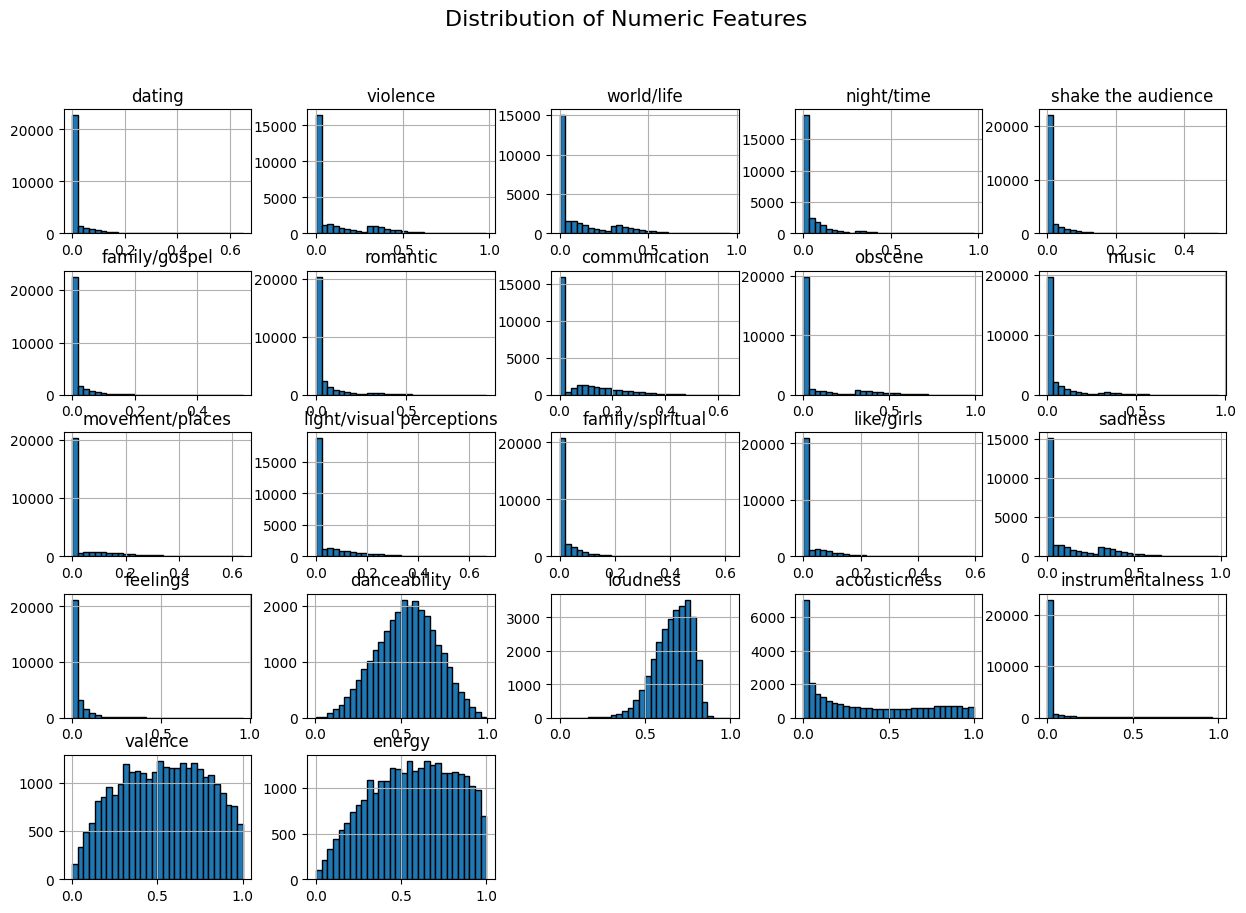

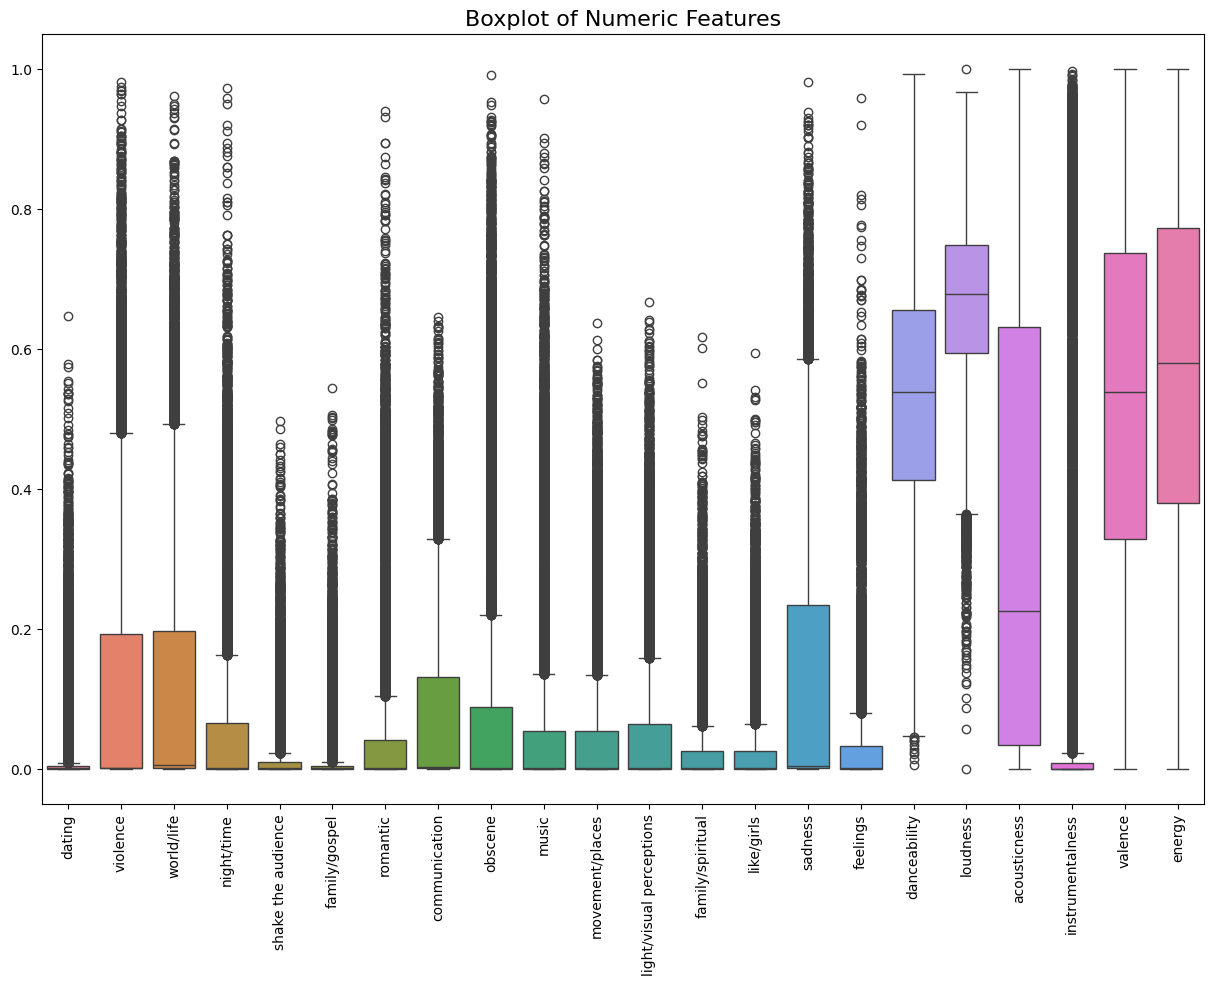

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of numeric features
plt.figure(figsize=(15, 10))
df[numeric_features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# Boxplots for numeric features to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot of Numeric Features', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
print(df[numeric_features].head())
from scipy.sparse import csr_matrix
tfidf_dense = tfidf_matrix.toarray()
combined_features = np.hstack([df[numeric_features].values, tfidf_dense])
print(combined_features.shape)


     dating  violence  world/life  night/time  shake the audience  \
0 -0.391712 -0.305855   -0.699056   -0.507401           -0.413684   
1  0.275459 -0.120996    1.872639   -0.501275           -0.396826   
2 -0.350237 -0.647112   -0.686443   -0.487995           -0.360278   
3  0.518198 -0.653951   -0.693540   -0.498914            0.100271   
4 -0.377363 -0.655062    1.723607   -0.500687           -0.395207   

   family/gospel  romantic  communication   obscene     music  ...  \
0       0.758051 -0.297631       1.707845 -0.532651 -0.168319  ...   
1       0.237390 -0.446751      -0.688320 -0.528870  0.470192  ...   
2      -0.340172  1.035725       1.588406 -0.520671  2.138607  ...   
3      -0.369294  3.420147      -0.685907 -0.527412 -0.474339  ...   
4      -0.374023  3.909285      -0.687719 -0.528507 -0.475948  ...   

   family/spiritual  like/girls   sadness  feelings  danceability  loudness  \
0         -0.461587   -0.469610  1.385172  1.202773     -1.013825 -1.947119   
1     

In [24]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip().lower()
    df['normalized_track_name'] = df['track_name'].str.strip().str.lower()

    if title not in df['normalized_track_name'].values:
        return f"Song '{title}' not found in the dataset."

    idx = df[df['normalized_track_name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df['track_name'].iloc[song_indices]

recommendations = get_recommendations("necessary evil")
print(recommendations)


20762      catch drift
11267         westfall
16956    evil got hold
6656       flexicution
27700       keep movin
12359      huck fosier
22095             dawn
21253            grove
25014       dream evil
6953     love lil pump
Name: track_name, dtype: object


In [26]:
import pickle

with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)